# CLT with REAL dice TESHEP 2024

You can view these sheets on github, but to modify them, you'll need to a version of jupyter. How to install it is explained here: http://jupyter.readthedocs.io/en/latest/install.html.
If you want to use the functions defined below to generate your own distributions, you need to compile them first. Easiest done by clicking (once have opened this as jupyter notebook): Kernel -> Restart & Run All. (Alternatively, you can use the >| button to click your way through, but you need to start from the beginning to have access to all functions defined on this sheet). Have fun!

Let's generate a few distributions and calculate the mean, mode, median for each.
Start by importing the relevant libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd

Let's generate a distribution we would get from throwing a (fair) die

In [3]:
filename="/Users/phjhr/Dropbox/TESHEP_Stats/2407_TESHEPStatistics/DiceRolled_v2.xlsx"  # <<<<<<<<< modify this
## replace the filename with the name OF your own downloaded Excel file
##         
dfall=pd.read_excel(filename)
#print(dfall[dfall["Roll a die once, submit the result"]>0])
#print(dfall["Roll a die once, submit the result"])

In [4]:
df=dfall[dfall["Roll a die once, submit the result"]>0]

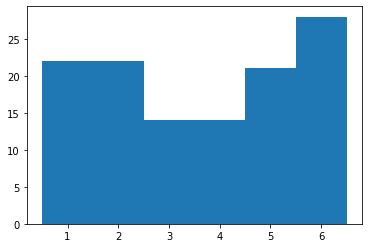

In [5]:
oneDieRandom =df["Roll a die once, submit the result"]
h=plt.hist(oneDieRandom, 6, range=(0.5, 6.5)) # make histogram
plt.show()

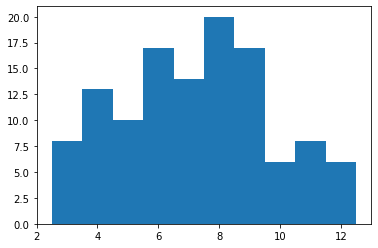

In [6]:
twoDiceRandom =df["Roll two dice (or one die twice), submit the sum of results"]
h=plt.hist(twoDiceRandom, 10, range=(2.5, 12.5)) # make histogram
plt.show()

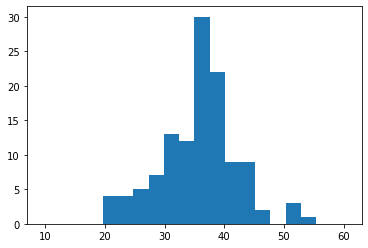

In [7]:
tenDiceRandom =df["Roll 10 dice, submit the sum of results"]
h=plt.hist(tenDiceRandom, 20, range=(9.5, 60.5)) # make histogram
plt.show()

Calulate arithmetic mean and std-dev

In [8]:
def meanAndStdev(sample):
    sum=0
    sumsq=0
    for x in sample:
        sum   += x
        sumsq += x**2
    N = len(sample)
    mean   = sum/N
    meansq = sumsq/N
    Variance = meansq - mean**2
    StandardDeviation = sqrt(Variance)
    return mean, Variance, StandardDeviation

In [9]:
mu, variance, sigma = meanAndStdev(oneDieRandom)
print("mean = ", mu, ", sigma = ", sigma)

mean =  3.6115702479338845 , sigma =  1.8513872432325091


Now let's throw multiple dice

We'll also need to be able to draw a Gaussian, for comparison

In [10]:
def gauss(x, mean, sigma):
    Del = (x-mean)/sigma
    return 1.0/(np.sqrt(2*pi)*sigma)  *  np.exp(-0.5*Del*Del)

Now let's put it all together in one neat function

In [11]:
def doAll(RandomDice, PDF,  NDice=1, histoBins=-1, histoMin=999, histoMax=-999, showGauss=0, chi2=0, average=0):

    if average:
        RandomDice /= NDice  # RandomDice a numpy array so this means every element will be divided by NDice
    Nevents=len(RandomDice)
    mini=histoMin
    maxi=histoMax

    if(histoMax < histoMin):
        mini=NDice -0.5
        maxi=NDice*6 + 0.5
        if average:
            mini /= NDice
            maxi /= NDice
        if mini > min(RandomDice) : mini = min(RandomDice) - 0.5
        if maxi < max(RandomDice) : maxi = max(RandomDice) + 0.5
    bins=int(maxi - mini)
    if average: bins=int((maxi-mini)*NDice)
        
    if histoBins > 0 : bins=histoBins
    
    h=plt.hist(RandomDice, bins, range=(mini, maxi)) # make histogram

    mu, var, sigma = meanAndStdev(RandomDice)
    
    if showGauss:
        oversampling=10
        dx = (maxi-mini)/bins
        xArray=np.arange(mini, maxi, dx/oversampling)
        plt.plot(xArray,gauss(xArray, mu, sigma)*dx*Nevents)

    plt.show()
    
    print("For ", NDice, " random numbers added ", Nevents, " times:")
    print("mean = ", mu, ", variance = ", var, ", sigma = ", sigma)
    
    if chi2:
        N=fsum(h[0])
        chi2sum=0
        for Nbin, bin_low, bin_up in zip(h[0], h[1], h[1][1:]):
            ##print(Nbins, ", ", bin_low, ", ", bin_up)
            binCentre=0.5*(bin_low + bin_up)
            binWidth= bin_up - bin_low
            theory=N*binWidth*gauss(binCentre, mu, sigma)
            measured=Nbin
            error_squared=theory
            chi2sum += (theory-measured)**2/error_squared
        Nbins=len(h[0])
        print("chi2 = ", chi2sum, " for ", Nbins, " bins; chi2/bin = ", chi2sum/Nbins)


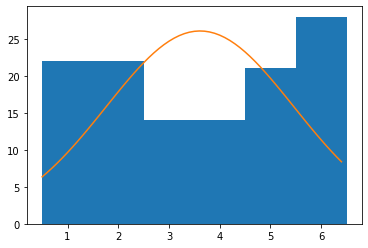

For  1  random numbers added  121  times:
mean =  3.6115702479338845 , variance =  3.4276347244040704 , sigma =  1.8513872432325091
chi2 =  51.16500241996745  for  6  bins; chi2/bin =  8.527500403327908


In [12]:
doAll(oneDieRandom, throwOneDie,  1, showGauss=1, chi2=1)

###### Let's try it out for a few distributions and see if mean and variance are both proportional to the number of dice, as expected, and let's also compare it to a Gaussian

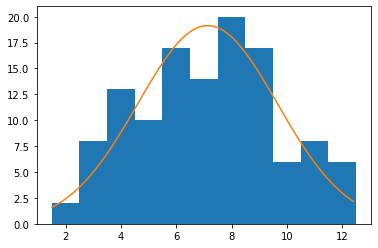

For  2  random numbers added  121  times:
mean =  7.132231404958677 , variance =  6.362680144798858 , sigma =  2.5224353598851366
chi2 =  12.109923188476948  for  11  bins; chi2/bin =  1.100902108043359


In [13]:
doAll(twoDiceRandom, throwOneDie,  2, showGauss=1, chi2=1)

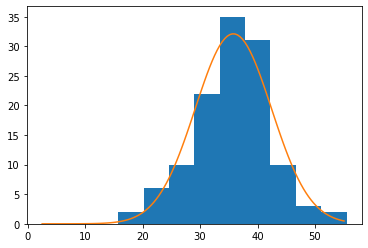

For  3  random numbers added  121  times:
mean =  35.79338842975206 , variance =  44.081278601188615 , sigma =  6.63937335907453
chi2 =  7.175185068532566  for  12  bins; chi2/bin =  0.5979320890443806


In [14]:
doAll(tenDiceRandom, throwOneDie,  3, showGauss=1, histoBins=12, chi2=1)

What happens if we average, instead of sum? According to the lectures, the mean should stay constant, but the variance should go down with NDice (and the standard deviation with \sqrt{NDICE}. Let's check:

In [15]:
def NamedDice(name, dataframe, chi2=0):
    dfName=dataframe[dataframe["Name"]==name]
    oneDieRandomName =dfName["Roll a die once, submit the result"]
    twoDiceRandomName =dfName["Roll two dice (or one die twice), submit the sum of results"]
    tenDiceRandomName =dfName["Roll 10 dice, submit the sum of results"]

    doAll(oneDieRandomName, throwOneDie,  1, showGauss=1, chi2=chi2)
    doAll(twoDiceRandomName, throwOneDie,  2, showGauss=1, chi2=chi2)
    doAll(tenDiceRandomName, throwOneDie,  10, showGauss=1, chi2=chi2)

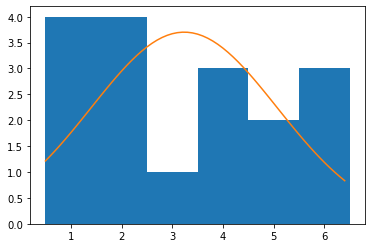

For  1  random numbers added  17  times:
mean =  3.235294117647059 , variance =  3.3564013840830444 , sigma =  1.832048412046757
chi2 =  8.043901181486689  for  6  bins; chi2/bin =  1.3406501969144482


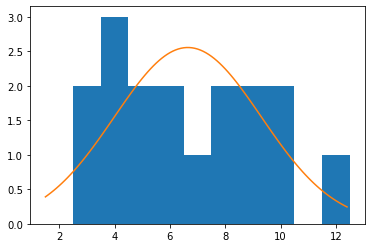

For  2  random numbers added  17  times:
mean =  6.647058823529412 , variance =  7.0519031141868425 , sigma =  2.655541962422519
chi2 =  6.623238417324547  for  11  bins; chi2/bin =  0.6021125833931407


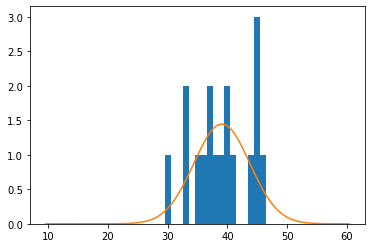

For  10  random numbers added  17  times:
mean =  39.05882352941177 , variance =  22.055363321799177 , sigma =  4.696313801461651
chi2 =  20.85190200935814  for  51  bins; chi2/bin =  0.4088608237129047


In [16]:
NamedDice("Vitali", df, chi2=1)

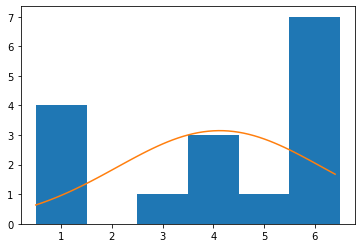

For  1  random numbers added  16  times:
mean =  4.125 , variance =  4.109375 , sigma =  2.027159342528357
chi2 =  25.665387138488203  for  6  bins; chi2/bin =  4.2775645230813675


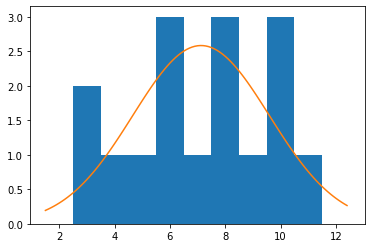

For  2  random numbers added  16  times:
mean =  7.125 , variance =  6.109375 , sigma =  2.4717149916606487
chi2 =  7.91035049189601  for  11  bins; chi2/bin =  0.7191227719905464


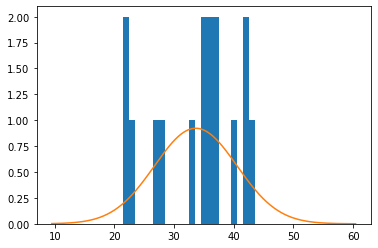

For  10  random numbers added  16  times:
mean =  33.625 , variance =  47.859375 , sigma =  6.918047051010856
chi2 =  36.917225721411675  for  51  bins; chi2/bin =  0.7238671710080721


In [17]:
NamedDice("Zak", df, chi2=1)